In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
df = pd.read_csv('/content/Mall_Customers (1).csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.duplicated().sum()

np.int64(0)

# K-means

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [9]:
df = df.drop(columns=["CustomerID"])

In [11]:
#encoding gender column
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [13]:
#Find optimal number of clusters (Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

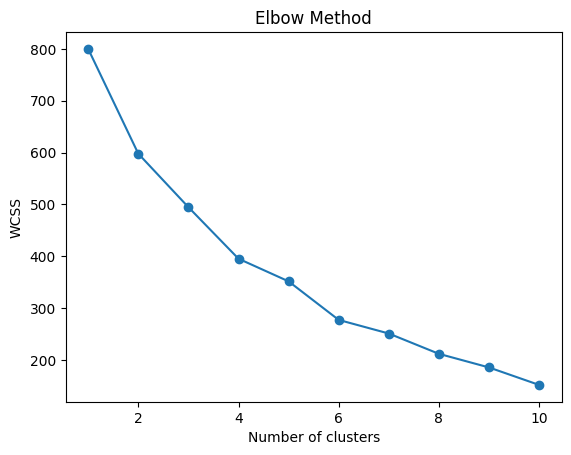

In [14]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


k = Five then

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

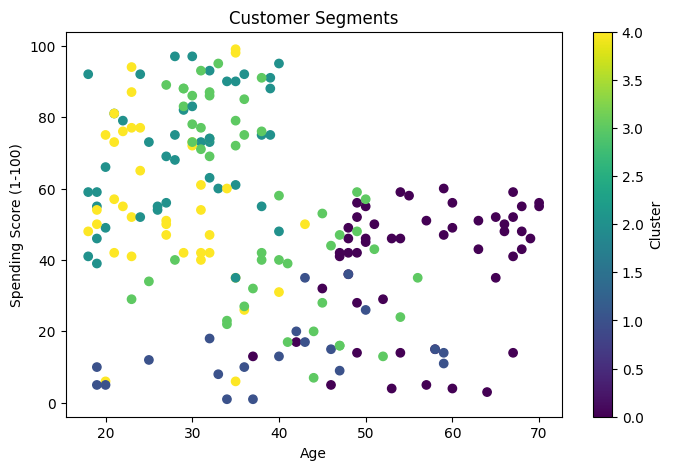

In [16]:
#Visualize clusters (using Age & Spending Score as example)
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.colorbar(label='Cluster')
plt.show()

In [17]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
 [[ 5.09803922e-01  5.64705882e+01  4.60980392e+01  3.93137255e+01]
 [ 1.00000000e+00  3.95000000e+01  8.51500000e+01  1.40500000e+01]
 [ 1.00000000e+00  2.86904762e+01  6.09047619e+01  7.02380952e+01]
 [-1.66533454e-16  3.78979592e+01  8.21224490e+01  5.44489796e+01]
 [ 1.66533454e-16  2.73157895e+01  3.88421053e+01  5.62105263e+01]]
